# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu,
        input_shape=(784,)),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])
model.summary()

# Alternative way
del model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu,
    input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                            

In [8]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Build a feedforward neural network model

In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
# Build the Sequential feeforward neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu,
    name='layer_1'))
model.add(tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Softmax())

# Print the model summary
model.summary()

print(f"layer_1 weight shape: {model.weights[0].shape}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
layer_1 weight sha

***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers

In [4]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same",
    activation=tf.keras.activations.relu, input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu)),
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                102464    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 103562 (404.54 KB)
Trainable params: 103562 (404.54 KB)
Non-trainable params: 0 (0.00 Byte)
______________

#### Build a convolutional neural network model

In [6]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
# Build the Sequential convolutional neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same",
    strides=2, activation=tf.keras.activations.relu, data_format="channels_first",
    input_shape=(1, 28, 28)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), data_format="channels_first"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 14, 14)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 4, 4)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2730 (10.66 KB)
Trainable params: 2730 (10.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.elu,
    input_shape=(32,)))
model.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.linear))

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(threshold=0.7), 
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile the model

In [3]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
# Build the Sequential convolutional neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same",
    strides=2, activation=tf.keras.activations.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Define the model optimizer, loss function and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


***
<a id="coding_tutorial_3"></a>
## The fit method

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation=tf.keras.activations.elu,
    input_shape=(32,)))
model.add(tf.keras.layers.Dense(units=100, activation=tf.keras.activations.softmax)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy()
    ]
)

# X_train: (num_samples, num_features)
# y_train: (num_samples, num_classes) (one-hot encoding)
history = model.fit(x=X_train, y=y_train, epochs=10, batch_size=16)

#### Load the data

#### Build a convolutional neural network model

In [19]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
# Build the sequential convolutional neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
    activation=tf.keras.activations.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile the model

In [20]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

# Define the model optimizer, loss function and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


In [4]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

# Print the shape of the training data
print("Train shape:", train_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train shape: (60000, 28, 28)


In [5]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(labels[train_labels[0]])

Ankle boot


In [6]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

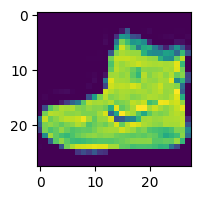

label: Ankle boot


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Display one of the images
i = 0
img = train_images[i, :, :]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap='viridis')
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

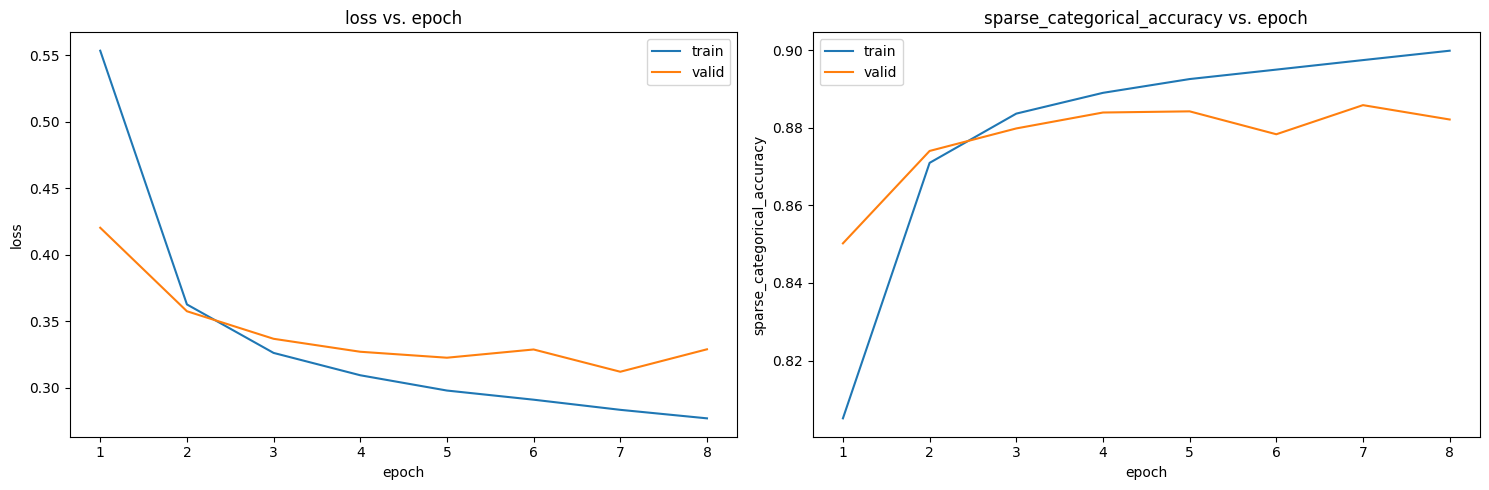

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Fit the model
history = model.fit(x=train_images[..., np.newaxis], y=train_labels, 
    validation_data=(test_images[..., np.newaxis], test_labels),
    epochs=8, batch_size=256, verbose=0)

# Load the history into a pandas Dataframe
df_history = pd.DataFrame(data=history.history, index=history.epoch)
# Make a plot for the loss & accuracy
metrics = ['loss', 'sparse_categorical_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index+1, y=metric)
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index+1, y=f'val_{metric}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{metric}')
    ax.set_title(label=f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid,
    input_shape=(12,)))

model.compile(
    optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

history = model.fit(x=X_train, y=y_train, verbose=0)

loss, accuracy, mae = model.evaluate(x=X_test, y=y_test, verbose=0)

# X_sample: (num_samples, 12)
pred = model.predict(x=X_sample, verbose=0) # (num_samples, 1)

#### Load the data

In [23]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

# Print the shape of the training data
print("Train shape:", train_images.shape)

Train shape: (60000, 28, 28)


In [24]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(labels[train_labels[0]])

Ankle boot


In [25]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

#### Build a convolutional neural network model

In [27]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

del model
# Build the sequential convolutional neural network model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
    activation=tf.keras.activations.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(), 
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

#### Fit the model

In [ ]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, 
    epochs=8, batch_size=256, verbose=0)

# Plot training history
PlotHistory(history, metrics=['loss', 'sparse_categorical_accuracy']).plot()

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(
    test_images[..., np.newaxis], test_labels, verbose=0)

print(f"loss: {test_loss:.2f}, accuracy: {test_accuracy:.2f}, mae: {test_mae:.2f}")

#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.figure(figsize=(2, 2))
plt.imshow(test_image, cmap='viridis')
plt.axis('off')
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

predictions = model.predict(
    test_image[np.newaxis, ..., np.newaxis], verbose=0)
print(f"Model predictions: {labels[np.argmax(predictions)]}")